In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score
import time
(x_train, train_labels), (x_test, test_labels) = cifar10.load_data()  #get the data


x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0  #normalize, reshape
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0


train=np.zeros((len(x_train),3073))
test=np.zeros((len(x_test),3073))
train[:,:-1]=x_train
train[:,-1]=train_labels.reshape((50000,))
test[:,:-1]=x_test
test[:,-1]=test_labels.reshape((10000,))

y_train=np.full((len(train_labels),10),0.1)       #encode the labels
for i in range(0,len(train_labels)):
    y_train[i,int(train_labels[i])]=0.9
y_test=np.full((len(test_labels),10),0.1)
for i in range(0,len(test_labels)):
    y_test[i,int(test_labels[i])]=0.9


C:\Users\jgatz\AppData\Local\Temp\ipykernel_17108\239697699.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train[i,int(train_labels[i])]=0.9
C:\Users\jgatz\AppData\Local\Temp\ipykernel_17108\239697699.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test[i,int(test_labels[i])]=0.9


This initialized the data and imported the libraries needed. Next, a check for the best values
Learning rate values= 0.01  0.001
a parameter for sigmoid= 0.5 2/3
batch size= 50 128 500
neurons= [3072,512,256,128,10]  
         [3072,256,10]  
It will become clear why I chose sigmoid function

Epoch 1/30 - Training Accuracy: [0.25462]
Testing Accuracy: [0.3382]
Time: 7.048 seconds
Epoch 2/30 - Training Accuracy: [0.3275]
Testing Accuracy: [0.3694]
Time: 6.58 seconds
Epoch 3/30 - Training Accuracy: [0.35212]
Testing Accuracy: [0.3854]
Time: 6.397 seconds
Epoch 4/30 - Training Accuracy: [0.36994]
Testing Accuracy: [0.3949]
Time: 6.48 seconds
Epoch 5/30 - Training Accuracy: [0.3824]
Testing Accuracy: [0.4045]
Time: 6.343 seconds
Epoch 6/30 - Training Accuracy: [0.39276]
Testing Accuracy: [0.4091]
Time: 6.58 seconds
Epoch 7/30 - Training Accuracy: [0.40204]
Testing Accuracy: [0.4163]
Time: 6.426 seconds
Epoch 8/30 - Training Accuracy: [0.40962]
Testing Accuracy: [0.4221]
Time: 6.366 seconds
Epoch 9/30 - Training Accuracy: [0.41676]
Testing Accuracy: [0.4272]
Time: 6.441 seconds
Epoch 10/30 - Training Accuracy: [0.4231]
Testing Accuracy: [0.4315]
Time: 6.081 seconds
Epoch 11/30 - Training Accuracy: [0.4286]
Testing Accuracy: [0.4335]
Time: 6.457 seconds
Epoch 12/30 - Training Acc

C:\Users\jgatz\AppData\Local\Temp\ipykernel_15792\3368809086.py:121: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])


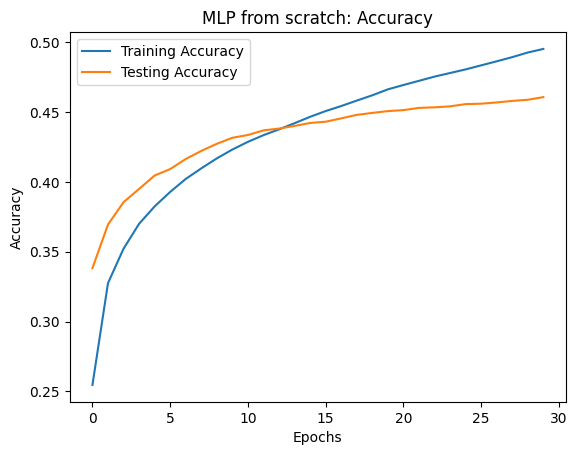

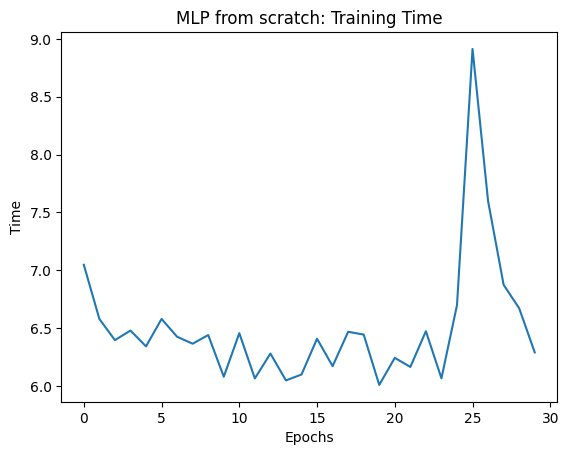

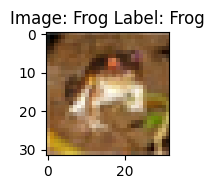

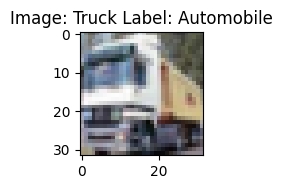

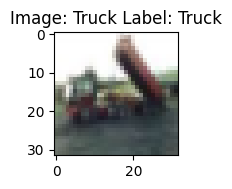

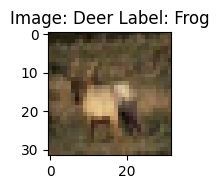

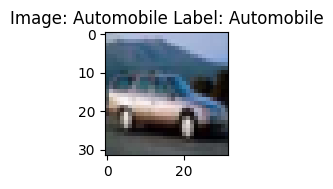

In [ ]:
#First Model--> Check for neuron number
learning_rate = 0.01
epochs = 30
batch_size = 128
neurons = [3072,256,10]   # Adjust the number of neurons in each layer
out_act='sigmoid'
in_act='sigmoid'
a= 2/3

num_layers = len(neurons) - 1

weights = [np.random.uniform(-0.5, 0.5, (neurons[i]+1, neurons[i+1])) for i in range(num_layers)]

def sigmoid(u):
    return 1 / (1 + np.exp(-a*u))

def sigmoid_derivative(u):
    return a*sigmoid(u) * (1 - sigmoid(u))


def relu(u):
    return np.maximum(0, u)

def relu_derivative(u):
    return np.where(u > 0, 1, 0)

def forward_pass(x, weights):
    x = np.hstack([x, np.ones((len(x), 1))])  #input with bias
    y_for_each_layer = [x]
    for i in range(num_layers):
        layer_input = np.dot(y_for_each_layer[-1], weights[i])   #for every layer
        if i == num_layers - 1:
            if out_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        else:
            if in_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        if i < num_layers - 1:  # Add bias to hidden layers
            y_for_each_layer[-1] = np.hstack([y_for_each_layer[-1], np.ones((len(y_for_each_layer[-1]), 1))])

    return y_for_each_layer

def backward_pass(y_for_each_layer, y_wanted, weights):
    #delta for output layer
    deltas = [(y_for_each_layer[-1] - y_wanted)*sigmoid_derivative(np.dot(y_for_each_layer[-2],weights[-1]))]
    for i in range(num_layers - 1, 0, -1): #deltas for the other layers
        deltas_without_bias = np.dot(deltas[0] , weights[i].T[:, :-1])
        if in_act=='sigmoid':
            deltas.insert(0, deltas_without_bias * sigmoid_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
        else:
            deltas.insert(0, deltas_without_bias * relu_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
    return deltas

acc=np.zeros((epochs,1))
acc_test=np.zeros((epochs,1))

def update_weights(y_for_each_layer, deltas, weights):
    for i in range(num_layers):
        weights[i] -= learning_rate * np.dot(y_for_each_layer[i].T, deltas[i])

pred=np.zeros((len(train)))
epoch_time=np.zeros((epochs))
for epoch in range(epochs):
    start=time.time()
    np.random.shuffle(train)
    for i in range(0, len(train), batch_size):
        x=x_train[i:i+batch_size,:]   #get batch data
        t=y_train[i:i+batch_size,:]

        y_for_each_layer = forward_pass(x, weights)
        y_pred = y_for_each_layer [-1]
        pred[i:i+batch_size]=np.argmax(y_pred,1)

        deltas = backward_pass(y_for_each_layer , t, weights)

        update_weights(y_for_each_layer , deltas, weights)
    end=time.time()
    acc[epoch]=accuracy_score(train_labels, pred)
    print(f'Epoch {epoch + 1}/{epochs} - Training Accuracy: {acc[epoch]}')

    y_test_pred = forward_pass(x_test, weights)[-1]
    prediction=np.argmax(y_test_pred,1)
    acc_test[epoch] =accuracy_score(test_labels, prediction)
    epoch_time[epoch]=np.round(end-start,3)
    print(f'Testing Accuracy: {acc_test[epoch]}')
    print(f'Time: {epoch_time[epoch]} seconds')

plt.figure(1)
plt.plot(acc)
plt.plot(acc_test)
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP from scratch: Accuracy")

plt.figure(2)
plt.plot(epoch_time)
plt.xlabel("Epochs")
plt.ylabel("Time")
plt.title("MLP from scratch: Training Time")

labels=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
for i in range(5):
    plt.figure(figsize=(1.6, 1.6))
    plt.imshow(x_train[i].reshape(32,32,3))
    plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])


Epoch 1/30 - Training Accuracy: [0.24816]
Testing Accuracy: [0.3251]
Time: 14.352 seconds
Epoch 2/30 - Training Accuracy: [0.33344]
Testing Accuracy: [0.3653]
Time: 12.707 seconds
Epoch 3/30 - Training Accuracy: [0.3604]
Testing Accuracy: [0.3832]
Time: 13.474 seconds
Epoch 4/30 - Training Accuracy: [0.37628]
Testing Accuracy: [0.3915]
Time: 13.008 seconds
Epoch 5/30 - Training Accuracy: [0.38824]
Testing Accuracy: [0.4019]
Time: 12.752 seconds
Epoch 6/30 - Training Accuracy: [0.39866]
Testing Accuracy: [0.4068]
Time: 12.33 seconds
Epoch 7/30 - Training Accuracy: [0.40778]
Testing Accuracy: [0.4152]
Time: 12.42 seconds
Epoch 8/30 - Training Accuracy: [0.41508]
Testing Accuracy: [0.422]
Time: 12.581 seconds
Epoch 9/30 - Training Accuracy: [0.42118]
Testing Accuracy: [0.4275]
Time: 12.87 seconds
Epoch 10/30 - Training Accuracy: [0.42676]
Testing Accuracy: [0.4338]
Time: 12.459 seconds
Epoch 11/30 - Training Accuracy: [0.43178]
Testing Accuracy: [0.4361]
Time: 12.756 seconds
Epoch 12/30 -

C:\Users\jgatz\AppData\Local\Temp\ipykernel_15792\4122076652.py:121: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])


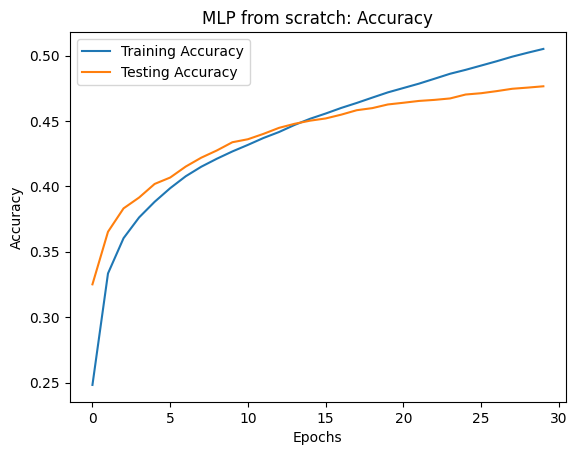

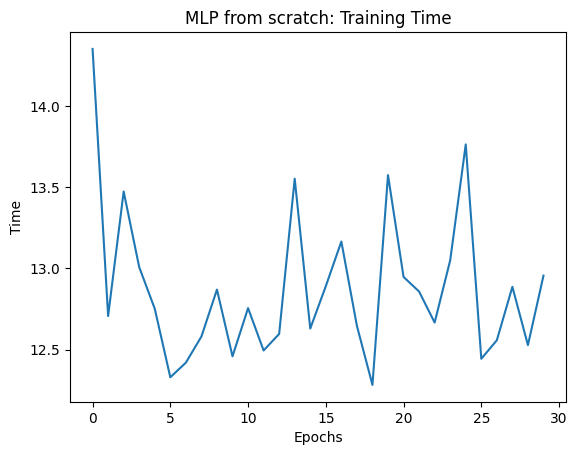

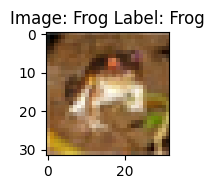

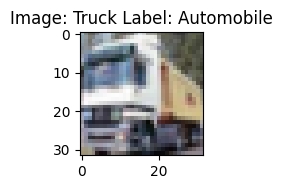

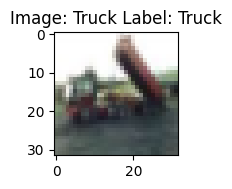

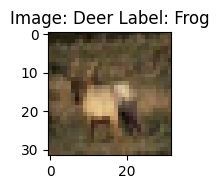

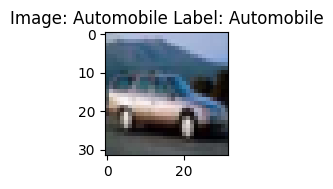

In [ ]:
#Second Model--> Check for neuron number
learning_rate = 0.01
epochs = 30
batch_size = 128
neurons =[3072,512,256,128,10]     # Adjust the number of neurons in each layer
out_act='sigmoid'
in_act='sigmoid'
a= 2/3

num_layers = len(neurons) - 1

weights = [np.random.uniform(-0.5, 0.5, (neurons[i]+1, neurons[i+1])) for i in range(num_layers)]

def sigmoid(u):
    return 1 / (1 + np.exp(-a*u))

def sigmoid_derivative(u):
    return a*sigmoid(u) * (1 - sigmoid(u))


def relu(u):
    return np.maximum(0, u)

def relu_derivative(u):
    return np.where(u > 0, 1, 0)

def forward_pass(x, weights):
    x = np.hstack([x, np.ones((len(x), 1))])
    y_for_each_layer = [x]
    for i in range(num_layers):
        layer_input = np.dot(y_for_each_layer[-1], weights[i])
        if i == num_layers - 1:
            if out_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        else:
            if in_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        if i < num_layers - 1:  # Add bias to hidden layers
            y_for_each_layer[-1] = np.hstack([y_for_each_layer[-1], np.ones((len(y_for_each_layer[-1]), 1))])

    return y_for_each_layer

def backward_pass(y_for_each_layer, y_wanted, weights):
    deltas = [(y_for_each_layer[-1] - y_wanted)*sigmoid_derivative(np.dot(y_for_each_layer[-2],weights[-1]))]
    for i in range(num_layers - 1, 0, -1):
        deltas_without_bias = np.dot(deltas[0] , weights[i].T[:, :-1])
        if in_act=='sigmoid':
            deltas.insert(0, deltas_without_bias * sigmoid_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
        else:
            deltas.insert(0, deltas_without_bias * relu_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
    return deltas

acc=np.zeros((epochs,1))
acc_test=np.zeros((epochs,1))

def update_weights(y_for_each_layer, deltas, weights):
    for i in range(num_layers):
        weights[i] -= learning_rate * np.dot(y_for_each_layer[i].T, deltas[i])

pred=np.zeros((len(train)))
epoch_time=np.zeros((epochs))
for epoch in range(epochs):
    start=time.time()
    np.random.shuffle(train)
    for i in range(0, len(train), batch_size):
        x=x_train[i:i+batch_size,:]
        t=y_train[i:i+batch_size,:]

        y_for_each_layer = forward_pass(x, weights)
        y_pred = y_for_each_layer [-1]
        pred[i:i+batch_size]=np.argmax(y_pred,1)

        deltas = backward_pass(y_for_each_layer , t, weights)

        update_weights(y_for_each_layer , deltas, weights)
    end=time.time()
    acc[epoch]=accuracy_score(train_labels, pred)
    print(f'Epoch {epoch + 1}/{epochs} - Training Accuracy: {acc[epoch]}')

    y_test_pred = forward_pass(x_test, weights)[-1]
    prediction=np.argmax(y_test_pred,1)
    acc_test[epoch] =accuracy_score(test_labels, prediction)
    epoch_time[epoch]=np.round(end-start,3)
    print(f'Testing Accuracy: {acc_test[epoch]}')
    print(f'Time: {epoch_time[epoch]} seconds')

plt.figure(1)
plt.plot(acc)
plt.plot(acc_test)
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP from scratch: Accuracy")

plt.figure(2)
plt.plot(epoch_time)
plt.xlabel("Epochs")
plt.ylabel("Time")
plt.title("MLP from scratch: Training Time")

labels=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
for i in range(5):
    plt.figure(figsize=(1.6, 1.6))
    plt.imshow(x_train[i].reshape(32,32,3))
    plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])


Epoch 1/30 - Training Accuracy: [0.26608]
Testing Accuracy: [0.3312]
Time: 10.923 seconds
Epoch 2/30 - Training Accuracy: [0.34012]
Testing Accuracy: [0.359]
Time: 10.432 seconds
Epoch 3/30 - Training Accuracy: [0.3652]
Testing Accuracy: [0.3798]
Time: 10.577 seconds
Epoch 4/30 - Training Accuracy: [0.38016]
Testing Accuracy: [0.3878]
Time: 10.229 seconds
Epoch 5/30 - Training Accuracy: [0.39294]
Testing Accuracy: [0.3956]
Time: 10.688 seconds
Epoch 6/30 - Training Accuracy: [0.40388]
Testing Accuracy: [0.4048]
Time: 10.486 seconds
Epoch 7/30 - Training Accuracy: [0.41234]
Testing Accuracy: [0.409]
Time: 10.206 seconds
Epoch 8/30 - Training Accuracy: [0.41994]
Testing Accuracy: [0.4134]
Time: 10.483 seconds
Epoch 9/30 - Training Accuracy: [0.42568]
Testing Accuracy: [0.417]
Time: 10.67 seconds
Epoch 10/30 - Training Accuracy: [0.43116]
Testing Accuracy: [0.4228]
Time: 10.26 seconds
Epoch 11/30 - Training Accuracy: [0.43622]
Testing Accuracy: [0.4257]
Time: 10.686 seconds
Epoch 12/30 - 

C:\Users\jgatz\AppData\Local\Temp\ipykernel_15792\3586218211.py:121: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])


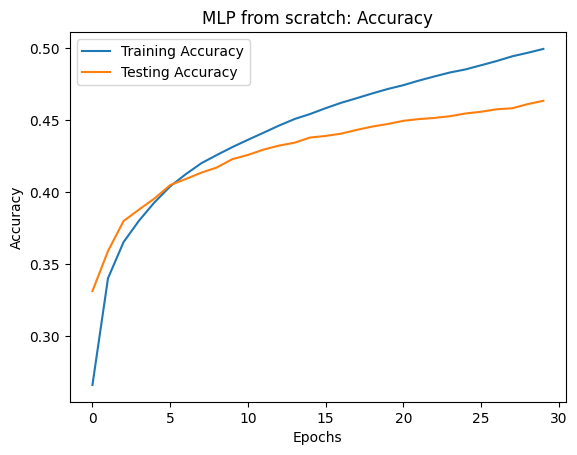

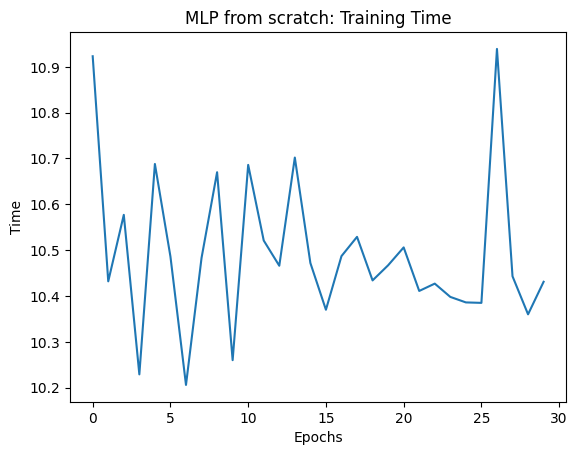

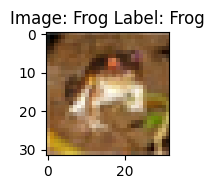

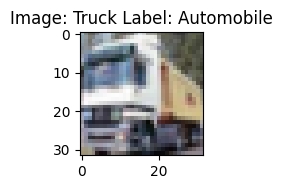

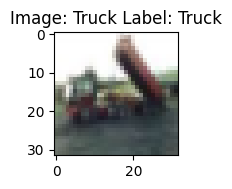

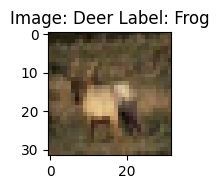

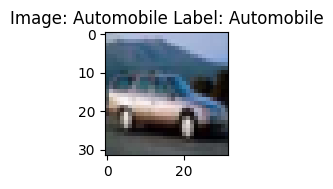

In [ ]:
#Third Model--> Check for batch size
learning_rate = 0.01
epochs = 30
batch_size = 50
neurons = [3072,256,10]   # Adjust the number of neurons in each layer
out_act='sigmoid'
in_act='sigmoid'
a= 2/3

num_layers = len(neurons) - 1

weights = [np.random.uniform(-0.5, 0.5, (neurons[i]+1, neurons[i+1])) for i in range(num_layers)]

def sigmoid(u):
    return 1 / (1 + np.exp(-a*u))

def sigmoid_derivative(u):
    return a*sigmoid(u) * (1 - sigmoid(u))


def relu(u):
    return np.maximum(0, u)

def relu_derivative(u):
    return np.where(u > 0, 1, 0)

def forward_pass(x, weights):
    x = np.hstack([x, np.ones((len(x), 1))])
    y_for_each_layer = [x]
    for i in range(num_layers):
        layer_input = np.dot(y_for_each_layer[-1], weights[i])
        if i == num_layers - 1:
            if out_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        else:
            if in_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        if i < num_layers - 1:  # Add bias to hidden layers
            y_for_each_layer[-1] = np.hstack([y_for_each_layer[-1], np.ones((len(y_for_each_layer[-1]), 1))])

    return y_for_each_layer

def backward_pass(y_for_each_layer, y_wanted, weights):
    deltas = [(y_for_each_layer[-1] - y_wanted)*sigmoid_derivative(np.dot(y_for_each_layer[-2],weights[-1]))]
    for i in range(num_layers - 1, 0, -1):
        deltas_without_bias = np.dot(deltas[0] , weights[i].T[:, :-1])
        if in_act=='sigmoid':
            deltas.insert(0, deltas_without_bias * sigmoid_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
        else:
            deltas.insert(0, deltas_without_bias * relu_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
    return deltas

acc=np.zeros((epochs,1))
acc_test=np.zeros((epochs,1))

def update_weights(y_for_each_layer, deltas, weights):
    for i in range(num_layers):
        weights[i] -= learning_rate * np.dot(y_for_each_layer[i].T, deltas[i])

pred=np.zeros((len(train)))
epoch_time=np.zeros((epochs))
for epoch in range(epochs):
    start=time.time()
    np.random.shuffle(train)
    for i in range(0, len(train), batch_size):
        x=x_train[i:i+batch_size,:]
        t=y_train[i:i+batch_size,:]

        y_for_each_layer = forward_pass(x, weights)
        y_pred = y_for_each_layer [-1]
        pred[i:i+batch_size]=np.argmax(y_pred,1)

        deltas = backward_pass(y_for_each_layer , t, weights)

        update_weights(y_for_each_layer , deltas, weights)
    end=time.time()
    acc[epoch]=accuracy_score(train_labels, pred)
    print(f'Epoch {epoch + 1}/{epochs} - Training Accuracy: {acc[epoch]}')

    y_test_pred = forward_pass(x_test, weights)[-1]
    prediction=np.argmax(y_test_pred,1)
    acc_test[epoch] =accuracy_score(test_labels, prediction)
    epoch_time[epoch]=np.round(end-start,3)
    print(f'Testing Accuracy: {acc_test[epoch]}')
    print(f'Time: {epoch_time[epoch]} seconds')

plt.figure(1)
plt.plot(acc)
plt.plot(acc_test)
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP from scratch: Accuracy")

plt.figure(2)
plt.plot(epoch_time)
plt.xlabel("Epochs")
plt.ylabel("Time")
plt.title("MLP from scratch: Training Time")

labels=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
for i in range(5):
    plt.figure(figsize=(1.6, 1.6))
    plt.imshow(x_train[i].reshape(32,32,3))
    plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])


Epoch 1/30 - Training Accuracy: [0.26872]
Testing Accuracy: [0.3286]
Time: 11.527 seconds
Epoch 2/30 - Training Accuracy: [0.3377]
Testing Accuracy: [0.3584]
Time: 10.968 seconds
Epoch 3/30 - Training Accuracy: [0.36156]
Testing Accuracy: [0.3733]
Time: 10.971 seconds
Epoch 4/30 - Training Accuracy: [0.37812]
Testing Accuracy: [0.386]
Time: 11.136 seconds
Epoch 5/30 - Training Accuracy: [0.391]
Testing Accuracy: [0.3967]
Time: 11.118 seconds
Epoch 6/30 - Training Accuracy: [0.40028]
Testing Accuracy: [0.4045]
Time: 10.948 seconds
Epoch 7/30 - Training Accuracy: [0.4078]
Testing Accuracy: [0.4099]
Time: 11.051 seconds
Epoch 8/30 - Training Accuracy: [0.41554]
Testing Accuracy: [0.4147]
Time: 11.127 seconds
Epoch 9/30 - Training Accuracy: [0.4211]
Testing Accuracy: [0.4199]
Time: 11.381 seconds
Epoch 10/30 - Training Accuracy: [0.42588]
Testing Accuracy: [0.4259]
Time: 11.273 seconds
Epoch 11/30 - Training Accuracy: [0.4316]
Testing Accuracy: [0.4306]
Time: 11.067 seconds
Epoch 12/30 - T

C:\Users\jgatz\AppData\Local\Temp\ipykernel_11688\1416939573.py:121: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])


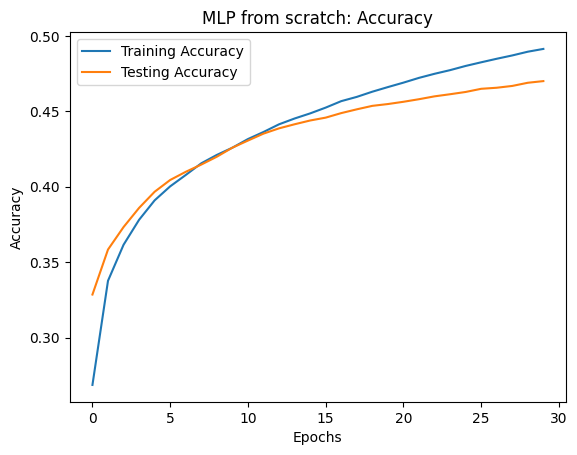

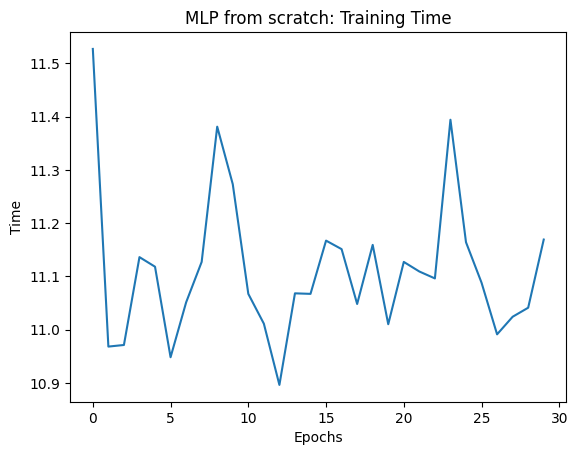

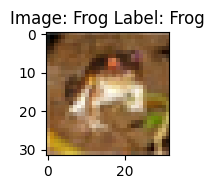

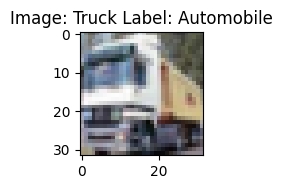

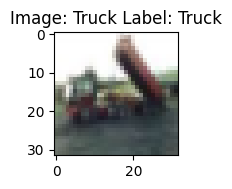

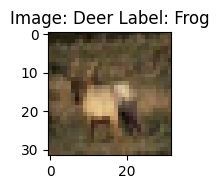

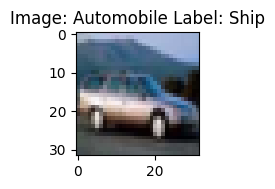

In [ ]:
#Fourth Model--> Check for a parameter of sigmoid
learning_rate = 0.01
epochs = 30
batch_size = 50
neurons = [3072,256,10]   # Adjust the number of neurons in each layer
out_act='sigmoid'
in_act='sigmoid'
a= 0.5

num_layers = len(neurons) - 1

weights = [np.random.uniform(-0.5, 0.5, (neurons[i]+1, neurons[i+1])) for i in range(num_layers)]

def sigmoid(u):
    return 1 / (1 + np.exp(-a*u))

def sigmoid_derivative(u):
    return a*sigmoid(u) * (1 - sigmoid(u))


def relu(u):
    return np.maximum(0, u)

def relu_derivative(u):
    return np.where(u > 0, 1, 0)

def forward_pass(x, weights):
    x = np.hstack([x, np.ones((len(x), 1))])
    y_for_each_layer = [x]
    for i in range(num_layers):
        layer_input = np.dot(y_for_each_layer[-1], weights[i])
        if i == num_layers - 1:
            if out_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        else:
            if in_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        if i < num_layers - 1:  # Add bias to hidden layers
            y_for_each_layer[-1] = np.hstack([y_for_each_layer[-1], np.ones((len(y_for_each_layer[-1]), 1))])

    return y_for_each_layer

def backward_pass(y_for_each_layer, y_wanted, weights):
    deltas = [(y_for_each_layer[-1] - y_wanted)*sigmoid_derivative(np.dot(y_for_each_layer[-2],weights[-1]))]
    for i in range(num_layers - 1, 0, -1):
        deltas_without_bias = np.dot(deltas[0] , weights[i].T[:, :-1])
        if in_act=='sigmoid':
            deltas.insert(0, deltas_without_bias * sigmoid_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
        else:
            deltas.insert(0, deltas_without_bias * relu_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
    return deltas

acc=np.zeros((epochs,1))
acc_test=np.zeros((epochs,1))

def update_weights(y_for_each_layer, deltas, weights):
    for i in range(num_layers):
        weights[i] -= learning_rate * np.dot(y_for_each_layer[i].T, deltas[i])

pred=np.zeros((len(train)))
epoch_time=np.zeros((epochs))
for epoch in range(epochs):
    start=time.time()
    np.random.shuffle(train)
    for i in range(0, len(train), batch_size):
        x=x_train[i:i+batch_size,:]
        t=y_train[i:i+batch_size,:]

        y_for_each_layer = forward_pass(x, weights)
        y_pred = y_for_each_layer [-1]
        pred[i:i+batch_size]=np.argmax(y_pred,1)

        deltas = backward_pass(y_for_each_layer , t, weights)

        update_weights(y_for_each_layer , deltas, weights)
    end=time.time()
    acc[epoch]=accuracy_score(train_labels, pred)
    print(f'Epoch {epoch + 1}/{epochs} - Training Accuracy: {acc[epoch]}')

    y_test_pred = forward_pass(x_test, weights)[-1]
    prediction=np.argmax(y_test_pred,1)
    acc_test[epoch] =accuracy_score(test_labels, prediction)
    epoch_time[epoch]=np.round(end-start,3)
    print(f'Testing Accuracy: {acc_test[epoch]}')
    print(f'Time: {epoch_time[epoch]} seconds')

plt.figure(1)
plt.plot(acc)
plt.plot(acc_test)
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP from scratch: Accuracy")

plt.figure(2)
plt.plot(epoch_time)
plt.xlabel("Epochs")
plt.ylabel("Time")
plt.title("MLP from scratch: Training Time")

labels=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
for i in range(5):
    plt.figure(figsize=(1.6, 1.6))
    plt.imshow(x_train[i].reshape(32,32,3))
    plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])


Epoch 1/30 - Training Accuracy: [0.17056]
Testing Accuracy: [0.2237]
Time: 12.13 seconds
Epoch 2/30 - Training Accuracy: [0.24312]
Testing Accuracy: [0.2606]
Time: 11.562 seconds
Epoch 3/30 - Training Accuracy: [0.26944]
Testing Accuracy: [0.2809]
Time: 11.016 seconds
Epoch 4/30 - Training Accuracy: [0.28826]
Testing Accuracy: [0.2963]
Time: 10.727 seconds
Epoch 5/30 - Training Accuracy: [0.30196]
Testing Accuracy: [0.3074]
Time: 11.216 seconds
Epoch 6/30 - Training Accuracy: [0.3126]
Testing Accuracy: [0.3156]
Time: 10.696 seconds
Epoch 7/30 - Training Accuracy: [0.32064]
Testing Accuracy: [0.3211]
Time: 11.089 seconds
Epoch 8/30 - Training Accuracy: [0.32766]
Testing Accuracy: [0.3259]
Time: 11.38 seconds
Epoch 9/30 - Training Accuracy: [0.33404]
Testing Accuracy: [0.3308]
Time: 10.867 seconds
Epoch 10/30 - Training Accuracy: [0.33948]
Testing Accuracy: [0.3345]
Time: 10.461 seconds
Epoch 11/30 - Training Accuracy: [0.34476]
Testing Accuracy: [0.3388]
Time: 10.445 seconds
Epoch 12/30

C:\Users\jgatz\AppData\Local\Temp\ipykernel_9492\3975833422.py:121: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])


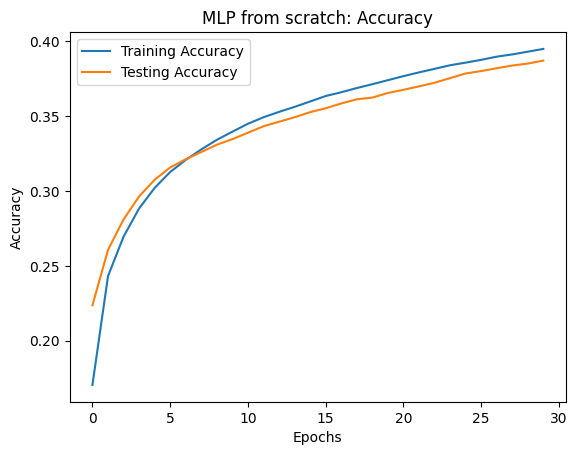

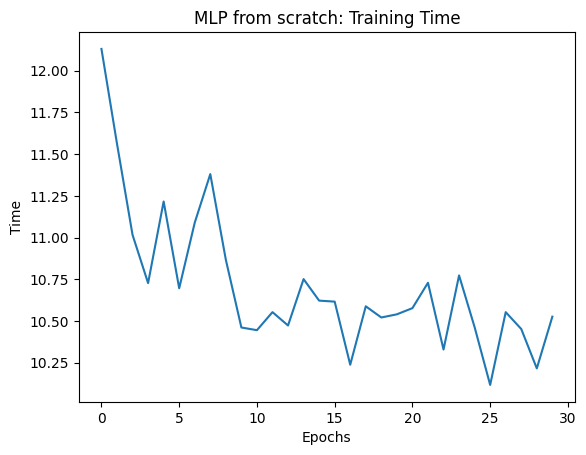

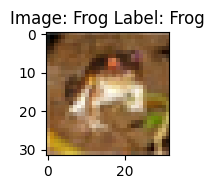

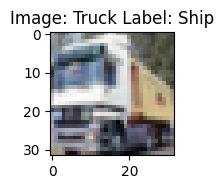

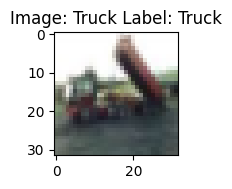

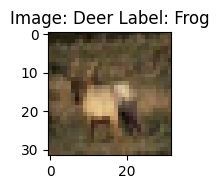

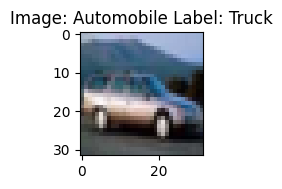

In [ ]:
#Fifth Model--> Check for learning rate
learning_rate = 0.001
epochs = 30
batch_size = 50
neurons = [3072,256,10]   # Adjust the number of neurons in each layer
out_act='sigmoid'
in_act='sigmoid'
a= 2/3

num_layers = len(neurons) - 1

weights = [np.random.uniform(-0.5, 0.5, (neurons[i]+1, neurons[i+1])) for i in range(num_layers)]

def sigmoid(u):
    return 1 / (1 + np.exp(-a*u))

def sigmoid_derivative(u):
    return a*sigmoid(u) * (1 - sigmoid(u))


def relu(u):
    return np.maximum(0, u)

def relu_derivative(u):
    return np.where(u > 0, 1, 0)

def forward_pass(x, weights):
    x = np.hstack([x, np.ones((len(x), 1))])
    y_for_each_layer = [x]
    for i in range(num_layers):
        layer_input = np.dot(y_for_each_layer[-1], weights[i])
        if i == num_layers - 1:
            if out_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        else:
            if in_act=='sigmoid':
                y_for_each_layer.append(sigmoid(layer_input))
            else:
                y_for_each_layer.append(relu(layer_input))
        if i < num_layers - 1:  # Add bias to hidden layers
            y_for_each_layer[-1] = np.hstack([y_for_each_layer[-1], np.ones((len(y_for_each_layer[-1]), 1))])

    return y_for_each_layer

def backward_pass(y_for_each_layer, y_wanted, weights):
    deltas = [(y_for_each_layer[-1] - y_wanted)*sigmoid_derivative(np.dot(y_for_each_layer[-2],weights[-1]))]
    for i in range(num_layers - 1, 0, -1):
        deltas_without_bias = np.dot(deltas[0] , weights[i].T[:, :-1])
        if in_act=='sigmoid':
            deltas.insert(0, deltas_without_bias * sigmoid_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
        else:
            deltas.insert(0, deltas_without_bias * relu_derivative(np.dot(y_for_each_layer[i - 1], weights[i - 1])))
    return deltas

acc=np.zeros((epochs,1))
acc_test=np.zeros((epochs,1))

def update_weights(y_for_each_layer, deltas, weights):
    for i in range(num_layers):
        weights[i] -= learning_rate * np.dot(y_for_each_layer[i].T, deltas[i])

pred=np.zeros((len(train)))
epoch_time=np.zeros((epochs))
for epoch in range(epochs):
    start=time.time()
    np.random.shuffle(train)
    for i in range(0, len(train), batch_size):
        x=x_train[i:i+batch_size,:]
        t=y_train[i:i+batch_size,:]

        y_for_each_layer = forward_pass(x, weights)
        y_pred = y_for_each_layer [-1]
        pred[i:i+batch_size]=np.argmax(y_pred,1)

        deltas = backward_pass(y_for_each_layer , t, weights)

        update_weights(y_for_each_layer , deltas, weights)
    end=time.time()
    acc[epoch]=accuracy_score(train_labels, pred)
    print(f'Epoch {epoch + 1}/{epochs} - Training Accuracy: {acc[epoch]}')

    y_test_pred = forward_pass(x_test, weights)[-1]
    prediction=np.argmax(y_test_pred,1)
    acc_test[epoch] =accuracy_score(test_labels, prediction)
    epoch_time[epoch]=np.round(end-start,3)
    print(f'Testing Accuracy: {acc_test[epoch]}')
    print(f'Time: {epoch_time[epoch]} seconds')

plt.figure(1)
plt.plot(acc)
plt.plot(acc_test)
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("MLP from scratch: Accuracy")

plt.figure(2)
plt.plot(epoch_time)
plt.xlabel("Epochs")
plt.ylabel("Time")
plt.title("MLP from scratch: Training Time")

labels=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
for i in range(5):
    plt.figure(figsize=(1.6, 1.6))
    plt.imshow(x_train[i].reshape(32,32,3))
    plt.title("Image: " + labels[int(train_labels[i])] + " Label: " + labels[int(pred[i])])
